**Import Libraries**

In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import classification_report, accuracy_score,\
f1_score, precision_score, confusion_matrix
from keras.utils import to_categorical

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
'''Import the file into python'''

filename = "/Users/admin/Downloads/Tweets.csv"

'''Convert the file into a dataframe and help pandas identify the date column'''
Tweets = pd.read_csv(filename, parse_dates=["tweet_created"])

'''Display the dataframe'''
Tweets

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52-08:00,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59-08:00,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48-08:00,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36-08:00,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45-08:00,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01-08:00,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46-08:00,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15-08:00,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02-08:00,New Jersey,Eastern Time (US & Canada)


In [3]:
'''Display the datatype of each column'''
Tweets.dtypes

tweet_id                                                         int64
airline_sentiment                                               object
airline_sentiment_confidence                                   float64
negativereason                                                  object
negativereason_confidence                                      float64
airline                                                         object
airline_sentiment_gold                                          object
name                                                            object
negativereason_gold                                             object
retweet_count                                                    int64
text                                                            object
tweet_coord                                                     object
tweet_created                   datetime64[ns, pytz.FixedOffset(-480)]
tweet_location                                                  object
user_t

In [4]:
'''General information about the dataframe'''
Tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype                                 
---  ------                        --------------  -----                                 
 0   tweet_id                      14640 non-null  int64                                 
 1   airline_sentiment             14640 non-null  object                                
 2   airline_sentiment_confidence  14640 non-null  float64                               
 3   negativereason                9178 non-null   object                                
 4   negativereason_confidence     10522 non-null  float64                               
 5   airline                       14640 non-null  object                                
 6   airline_sentiment_gold        40 non-null     object                                
 7   name                          14640 non-null  object                        

In [5]:
'''Statistical description of the dataframe'''
Tweets.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [6]:
'''Display the null values in each column'''
Tweets.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [7]:
'''Drop the necessary column deemed as uncessary'''

Tweets.drop(["negativereason", "airline_sentiment_gold", "negativereason_gold",
            "tweet_coord", "text", "tweet_id", "tweet_created", "tweet_location","name"], axis=1)

,airline_sentiment,airline_sentiment_confidence,negativereason_confidence,airline,retweet_count,user_timezone
0,neutral,1.0000,NaN,Virgin America,0,Eastern Time (US & Canada)
1,positive,0.3486,0.0000,Virgin America,0,Pacific Time (US & Canada)
2,neutral,0.6837,NaN,Virgin America,0,Central Time (US & Canada)
3,negative,1.0000,0.7033,Virgin America,0,Pacific Time (US & Canada)
4,negative,1.0000,1.0000,Virgin America,0,Pacific Time (US & Canada)
...,...,...,...,...,...,...
14635,positive,0.3487,0.0000,American,0,NaN
14636,negative,1.0000,1.0000,American,0,NaN
14637,neutral,1.0000,NaN,American,0,NaN
14638,negative,1.0000,0.6659,American,0,Eastern Time (US & Canada)


In [8]:
'''Call the column in the order I want them to appear
The goal is move the airline_sentiment which is the 
dependent variable to the last column.'''

Tweets = Tweets[["airline_sentiment_confidence",
                "negativereason_confidence","airline","retweet_count","user_timezone","airline_sentiment"]]

Tweets

,airline_sentiment_confidence,negativereason_confidence,airline,retweet_count,user_timezone,airline_sentiment
0,1.0000,NaN,Virgin America,0,Eastern Time (US & Canada),neutral
1,0.3486,0.0000,Virgin America,0,Pacific Time (US & Canada),positive
2,0.6837,NaN,Virgin America,0,Central Time (US & Canada),neutral
3,1.0000,0.7033,Virgin America,0,Pacific Time (US & Canada),negative
4,1.0000,1.0000,Virgin America,0,Pacific Time (US & Canada),negative
...,...,...,...,...,...,...
14635,0.3487,0.0000,American,0,NaN,positive
14636,1.0000,1.0000,American,0,NaN,negative
14637,1.0000,NaN,American,0,NaN,neutral
14638,1.0000,0.6659,American,0,Eastern Time (US & Canada),negative


In [9]:
'''Count the number of values in each column'''

Tweets["user_timezone"].value_counts()

Eastern Time (US & Canada)    3744
Central Time (US & Canada)    1931
Pacific Time (US & Canada)    1208
Quito                          738
Atlantic Time (Canada)         497
                              ... 
Warsaw                           1
Bucharest                        1
Wellington                       1
Sarajevo                         1
Saskatchewan                     1
Name: user_timezone, Length: 85, dtype: int64

In [10]:
'''Replace the null values in the user_timezone column with the highest occuring value'''

Tweets["user_timezone"] = Tweets["user_timezone"].replace(np.nan,"Eastern Time (US & Canada)")

'''Display the unique values in the user_timezone column'''

Tweets["user_timezone"].unique()

<ipython-input-10-d4c5a7006cd2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tweets["user_timezone"] = Tweets["user_timezone"].replace(np.nan,"Eastern Time (US & Canada)")


array(['Eastern Time (US & Canada)', 'Pacific Time (US & Canada)',
       'Central Time (US & Canada)', 'America/New_York',
       'Atlantic Time (Canada)', 'Quito', 'Mountain Time (US & Canada)',
       'Vienna', 'Caracas', 'Kuala Lumpur', 'Brisbane', 'Arizona',
       'London', 'Tehran', 'Alaska', 'Sydney', 'Irkutsk', 'Santiago',
       'Amsterdam', 'Tijuana', 'Abu Dhabi', 'Central America',
       'Edinburgh', 'Jerusalem', 'Hawaii', 'Paris', 'Guam', 'New Delhi',
       'Stockholm', 'America/Chicago', 'Berlin', 'Madrid', 'Athens',
       'Brussels', 'Taipei', 'Rome', 'Beijing', 'Mexico City', 'Bern',
       'Singapore', 'Indiana (East)', 'Melbourne', 'Saskatchewan',
       'Casablanca', 'Brasilia', 'Kyiv', 'Bucharest', 'Greenland',
       'Prague', 'New Caledonia', 'Bogota', 'Seoul', 'Sarajevo',
       'Wellington', 'Bangkok', 'Warsaw', 'Copenhagen', 'Hong Kong',
       'Guadalajara', 'Mid-Atlantic', 'Mazatlan', 'Buenos Aires',
       'America/Los_Angeles', 'Dublin', 'Lisbon', 'Newfo

In [11]:
'''One hot encode the column airline'''

oHe = pd.get_dummies(Tweets, columns=["airline"])

'''Drop the qualitative columns that were encoded'''

Tweetss = Tweets.drop(["airline_sentiment_confidence",
                        "negativereason_confidence",
                        "retweet_count",
                        "user_timezone",
                        "airline_sentiment","airline"
                        ], axis=1)

'''Concatenate the original dataframe and the resultant dataframe'''
Tweets = pd.concat([Tweetss, oHe], axis=1)

Tweets

,airline_sentiment_confidence,negativereason_confidence,retweet_count,user_timezone,airline_sentiment,airline_American,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America
0,1.0000,NaN,0,Eastern Time (US & Canada),neutral,0,0,0,0,0,1
1,0.3486,0.0000,0,Pacific Time (US & Canada),positive,0,0,0,0,0,1
2,0.6837,NaN,0,Central Time (US & Canada),neutral,0,0,0,0,0,1
3,1.0000,0.7033,0,Pacific Time (US & Canada),negative,0,0,0,0,0,1
4,1.0000,1.0000,0,Pacific Time (US & Canada),negative,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
14635,0.3487,0.0000,0,Eastern Time (US & Canada),positive,1,0,0,0,0,0
14636,1.0000,1.0000,0,Eastern Time (US & Canada),negative,1,0,0,0,0,0
14637,1.0000,NaN,0,Eastern Time (US & Canada),neutral,1,0,0,0,0,0
14638,1.0000,0.6659,0,Eastern Time (US & Canada),negative,1,0,0,0,0,0


In [12]:
'''We use labelencoder here because the values are much'''

Le = Tweets[["user_timezone", "airline_sentiment"]].apply(LabelEncoder().fit_transform)

# Le

Tweetss = Tweets.drop(["user_timezone", "airline_sentiment"], axis=1)

Tweets = pd.concat([Tweetss, Le], axis=1)

Tweets

,airline_sentiment_confidence,negativereason_confidence,retweet_count,airline_American,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America,user_timezone,airline_sentiment
0,1.0000,NaN,0,0,0,0,0,0,1,31,1
1,0.3486,0.0000,0,0,0,0,0,0,1,62,2
2,0.6837,NaN,0,0,0,0,0,0,1,27,1
3,1.0000,0.7033,0,0,0,0,0,0,1,62,0
4,1.0000,1.0000,0,0,0,0,0,0,1,62,0
...,...,...,...,...,...,...,...,...,...,...,...
14635,0.3487,0.0000,0,1,0,0,0,0,0,31,2
14636,1.0000,1.0000,0,1,0,0,0,0,0,31,0
14637,1.0000,NaN,0,1,0,0,0,0,0,31,1
14638,1.0000,0.6659,0,1,0,0,0,0,0,31,0


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='negativereason_confidence'>

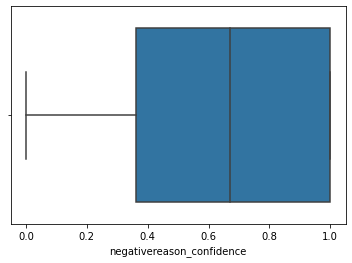

In [13]:
'''The purpose of this boxplot is to determine which statistical measure to use
to fill null values.
Since majority of the data is close to the mean, the mean is a good measure to use.'''

sns.boxplot(Tweets["negativereason_confidence"])

In [14]:
'''Calculating the mean'''

Tweets["negativereason_confidence"].mean()

0.6382982797947159

In [15]:
'''replace the null values with the mean'''

Tweets["negativereason_confidence"] = Tweets["negativereason_confidence"].\
                                    fillna(Tweets["negativereason_confidence"].mean())

Tweets

,airline_sentiment_confidence,negativereason_confidence,retweet_count,airline_American,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America,user_timezone,airline_sentiment
0,1.0000,0.638298,0,0,0,0,0,0,1,31,1
1,0.3486,0.000000,0,0,0,0,0,0,1,62,2
2,0.6837,0.638298,0,0,0,0,0,0,1,27,1
3,1.0000,0.703300,0,0,0,0,0,0,1,62,0
4,1.0000,1.000000,0,0,0,0,0,0,1,62,0
...,...,...,...,...,...,...,...,...,...,...,...
14635,0.3487,0.000000,0,1,0,0,0,0,0,31,2
14636,1.0000,1.000000,0,1,0,0,0,0,0,31,0
14637,1.0000,0.638298,0,1,0,0,0,0,0,31,1
14638,1.0000,0.665900,0,1,0,0,0,0,0,31,0


In [16]:
'''No Null value is present in the dataframe'''

Tweets.isnull().sum()

airline_sentiment_confidence    0
negativereason_confidence       0
retweet_count                   0
airline_American                0
airline_Delta                   0
airline_Southwest               0
airline_US Airways              0
airline_United                  0
airline_Virgin America          0
user_timezone                   0
airline_sentiment               0
dtype: int64

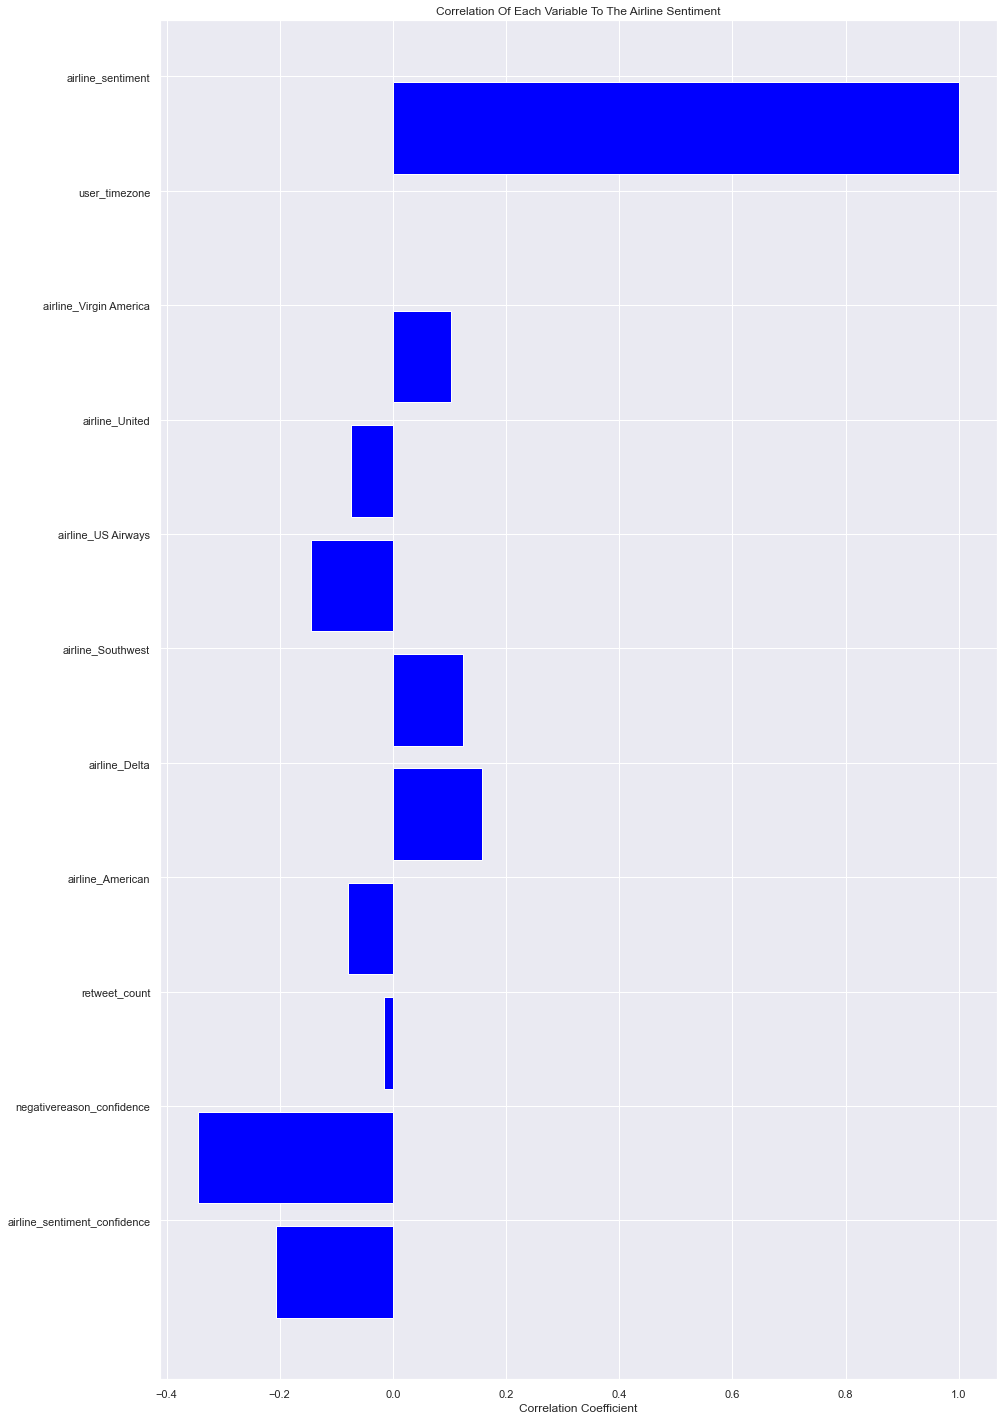

In [17]:
'''It is necessary to visualize how correlated each feature is to the dependent variable.'''

sns.set_theme()
NumberFeatures = Tweets.columns[Tweets.dtypes!=object]
NumberFeatures =Tweets[1:-1]
labels = []
values = []
for col in NumberFeatures:
    labels.append(col)
    values.append(np.corrcoef(Tweets[col].values, Tweets.airline_sentiment.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,25))
rects = ax.barh(ind, np.array(values), color='blue')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel('Correlation Coefficient')
ax.set_title('Correlation Of Each Variable To The Airline Sentiment')
plt.show()

In [18]:
'''From the graph above, the user_timezone shows no correlation
so it makes sense to drop the feature.'''

Tweets = Tweets.drop(["user_timezone"], axis=1)

In [19]:
'''The independent variables are assigned to X'''

X = Tweets.iloc[:,:9]

'''The dependent variable is assigned to y'''

y = Tweets.iloc[:,-1]

In [20]:
'''Standardize the data'''

scaler= StandardScaler()

scaledX = scaler.fit_transform(X)

In [21]:
'''The dataset is a bit imbalanced
As a result, StratifiedKFold has been employed as the validation technique,
a Support Vector Classification (SVC) model has been used,
and the data has been split into train and test set.'''

'''The list of possible accuracies from the model are also presented'''

skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

Svc_Model = SVC()
lst_accu_stratified_train = []
lst_accu_stratified_val = []

for train_index, val_index in skf.split(X, y):
    X_train_fold, X_val_fold = scaledX[train_index], scaledX[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]
    
    Svc_Model.fit(X_train_fold, y_train_fold)
    lst_accu_stratified_train.append(Svc_Model.score(X_train_fold, y_train_fold))
    lst_accu_stratified_val.append(Svc_Model.score(X_val_fold, y_val_fold))
  
print ('For train data')
print('List of possible accuracy:', lst_accu_stratified_train)
print('Maximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_train)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified_train)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified_train)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified_train))

print ('\n')
print ('For validation data')
print('List of possible accuracy:', lst_accu_stratified_val)
print('Maximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_val)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified_val)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified_val)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified_val))

For train data
List of possible accuracy: [0.7098702185792349, 0.7028688524590164, 0.7078210382513661, 0.7074795081967213, 0.703125]
Maximum Accuracy That can be obtained from this model is: 70.9870218579235 %
Minimum Accuracy: 70.28688524590164 %
Overall Accuracy: 70.62329234972677 %
Standard Deviation is: 0.0030936289294964626


For validation data
List of possible accuracy: [0.6994535519125683, 0.6936475409836066, 0.70525956284153, 0.7038934426229508, 0.7056010928961749]
Maximum Accuracy That can be obtained from this model is: 70.56010928961749 %
Minimum Accuracy: 69.36475409836066 %
Overall Accuracy: 70.15710382513662 %
Standard Deviation is: 0.005062254278104085


In [22]:
'''The trained SVC model has been used to make predicitions on the train and test or validation data'''

SVC_predictions_train = Svc_Model.predict(X_train_fold)
print("accuracy on train data = ",(accuracy_score(y_train_fold, SVC_predictions_train)))

SVC_predictions_val = Svc_Model.predict(X_val_fold)
print("accuracy on validation data = ",(accuracy_score(y_val_fold, SVC_predictions_val)))


accuracy on train data =  0.703125
accuracy on validation data =  0.7056010928961749


In [23]:
'''The SVC model has been tuned, however no improvement is observed from the model.'''

gamma = ["scale", "auto"]
param_grid = dict(gamma=gamma)
##############################################
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
grid = GridSearchCV(estimator=Svc_Model, param_grid=param_grid, scoring="accuracy", cv=skf)
grid_result = grid.fit(X_train_fold, y_train_fold)
print("Best error on kfold training + validation data: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
######################################################
gamma = grid_result.best_params_['gamma']
################################################
Svc_Model = SVC(gamma=gamma)
Svc_Model.fit(X_train_fold, y_train_fold)
Svc_predictionsgrid_train = Svc_Model.predict(X_train_fold)
print("accuracy on train data = ",(accuracy_score(y_train_fold, Svc_predictionsgrid_train)))

# predict the validation dataset
Svc_predictionsgrid_val = Svc_Model.predict(X_val_fold)
print("accuracy on validation data = ",(accuracy_score(y_val_fold, Svc_predictionsgrid_val)))

Best error on kfold training + validation data: 0.692538 using {'gamma': 'scale'}
accuracy on train data =  0.703125
accuracy on validation data =  0.7056010928961749


**Aritifical Neural Network (ANN) have also been employed in this work**

Results for fold 1
92/92 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      1835
     neutral       0.59      0.76      0.67       620
    positive       0.51      0.33      0.40       473

    accuracy                           0.84      2928
   macro avg       0.70      0.70      0.69      2928
weighted avg       0.83      0.84      0.83      2928

Accuracy  : 0.8384562841530054
Precision : 0.8348491939377132
f1Score : 0.8311821143931577


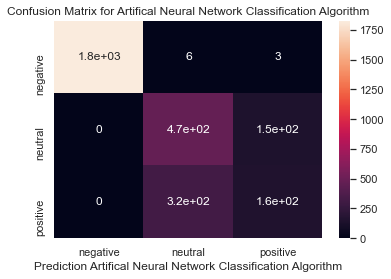

Results for fold 2
92/92 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      1835
     neutral       0.60      0.63      0.61       620
    positive       0.48      0.45      0.46       473

    accuracy                           0.83      2928
   macro avg       0.69      0.69      0.69      2928
weighted avg       0.83      0.83      0.83      2928

Accuracy  : 0.83025956284153
Precision : 0.8301101613847414
f1Score : 0.8300150823656128


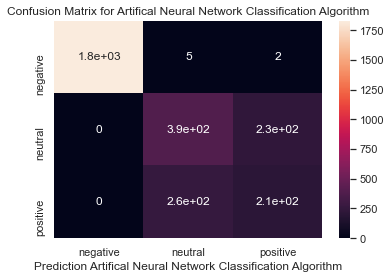

Results for fold 3
92/92 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

    negative       1.00      0.99      1.00      1836
     neutral       0.59      0.82      0.69       620
    positive       0.52      0.27      0.36       472

    accuracy                           0.84      2928
   macro avg       0.70      0.69      0.68      2928
weighted avg       0.84      0.84      0.83      2928

Accuracy  : 0.8398224043715847
Precision : 0.8364474676516482
f1Score : 0.8277062459661713


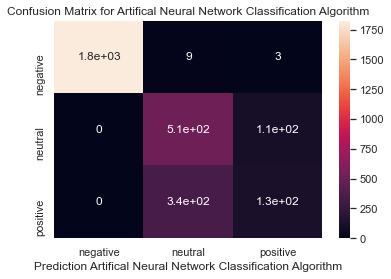

Results for fold 4
92/92 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      1836
     neutral       0.58      0.79      0.67       620
    positive       0.50      0.27      0.35       472

    accuracy                           0.84      2928
   macro avg       0.69      0.69      0.67      2928
weighted avg       0.83      0.84      0.82      2928

Accuracy  : 0.8360655737704918
Precision : 0.8301700488894009
f1Score : 0.8243064761566258


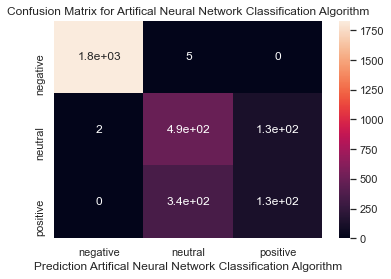

Results for fold 5
92/92 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      1836
     neutral       0.60      0.83      0.70       619
    positive       0.56      0.28      0.37       473

    accuracy                           0.85      2928
   macro avg       0.72      0.70      0.69      2928
weighted avg       0.84      0.85      0.83      2928

Accuracy  : 0.8463114754098361
Precision : 0.8439541001012785
f1Score : 0.8334886586604903


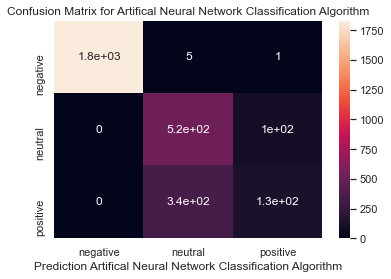

In [25]:
'''An ANN model has been tuned and used for predicting the train and test data.'''

n_class = len(np.unique(y))

'''The Neural network structure'''

Ann_Model=Sequential([
    Dense(units = 50, activation = 'relu', input_dim = 9, kernel_initializer='normal'),
    Dense(units = 50, activation = 'relu', kernel_initializer='normal'),
    Dense(units = n_class, activation='softmax')
])

Ann_Model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

'''A function that computes the confusion matrix, so we can visualize how
well our model is performing.'''

#<<<<>>>>>>>>>>
def Results(val, pred):
    target_names = ['negative', 'neutral', 'positive']
    print(classification_report(val, pred, target_names=target_names))
    accuracy = accuracy_score(val, pred)
    precision=precision_score(val, pred, average='weighted', labels=np.unique(y_val_fold))
    f1Score=f1_score(val, pred, average='weighted', labels=np.unique(y_val_fold)) 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))  
    # Plot Confusion Matrix for Logistic Regression Classification Algorithm
    confusionmatrix = confusion_matrix(y_val_fold, ANN_Predictions_val)
    label = ['negative', 'neutral', 'positive']
    sns.heatmap(confusionmatrix, annot = True, xticklabels = label, yticklabels = label)
    plt.xlabel("Prediction Artifical Neural Network Classification Algorithm")
    plt.title("Confusion Matrix for Artifical Neural Network Classification Algorithm")
    plt.show()

#<<<<<<>>>>>>>>>

skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
skf.get_n_splits(X, y)
foldNum=0
for train_index, val_index in skf.split(X, y):
    foldNum+=1
    print("Results for fold",foldNum)
    X_train_fold, X_val_fold = scaledX[train_index], scaledX[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    y_train_fold = to_categorical(y_train_fold)
    y_val_fold = to_categorical(y_val_fold)    
    
    Ann_Model.fit(X_train_fold, y_train_fold, 
                        validation_data = (X_val_fold, y_val_fold), 
                        epochs=110, 
                        batch_size=16, verbose=0)  
    
    ANN_Predictions_val = Ann_Model.predict(X_val_fold)
    
    ANN_Predictions_val = np.argmax(ANN_Predictions_val, axis=1)
    y_val_fold = np.argmax(y_val_fold, axis=1)
    
    Results(y_val_fold, ANN_Predictions_val)

In [26]:
'''The ANN model has been used to predict the train and test data
With the overall accuracy presented.'''

y_train_fold = np.argmax(y_train_fold, axis=1)
ANN_Predictions_train = Ann_Model.predict(X_train_fold)
ANN_Predictions_train = np.argmax(ANN_Predictions_train, axis=1)
print("accuracy on train data = ",(accuracy_score(y_train_fold, ANN_Predictions_train)))
 
ANN_Predictions_val = Ann_Model.predict(X_val_fold)
ANN_Predictions_val = np.argmax(ANN_Predictions_val, axis=1)
print("accuracy on validation data = ",(accuracy_score(y_val_fold, ANN_Predictions_val)))

366/366 [==============================] - 0s 1ms/step
accuracy on train data =  0.8431523224043715
92/92 [==============================] - 0s 1ms/step
accuracy on validation data =  0.8463114754098361
